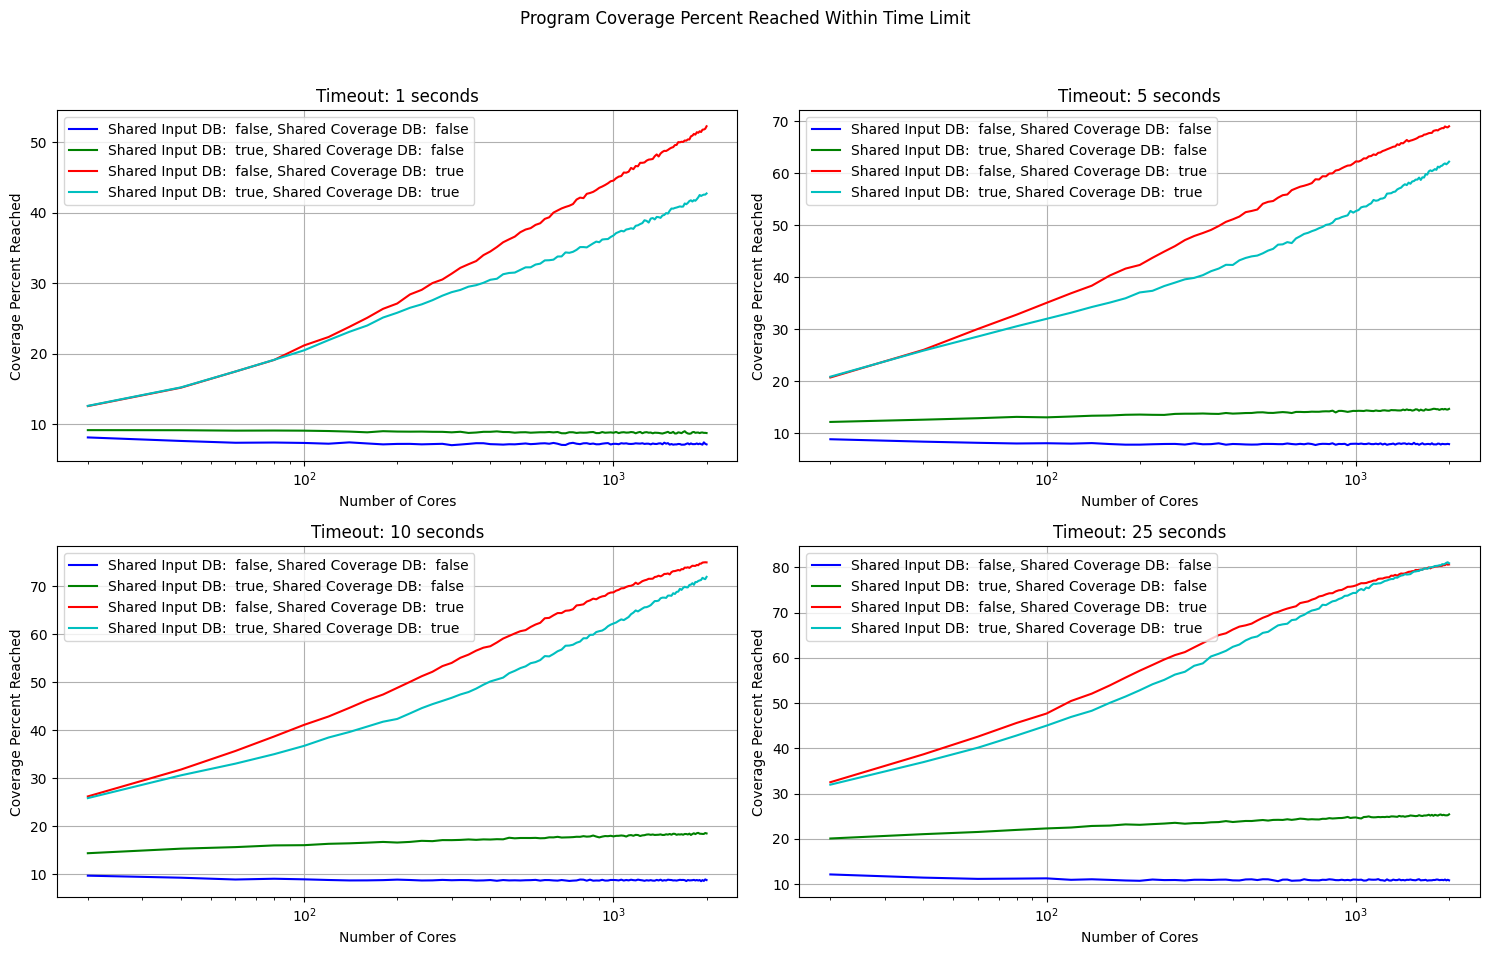

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('coverage_reached_with_timeout.csv')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Program Coverage Percent Reached Within Time Limit')

# Get the unique durations and sort them to maintain order
unique_durations = sorted(df['duration_seconds'].unique())

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Iterate through each unique duration and create a plot on the corresponding subplot
for i, duration in enumerate(unique_durations):
    # Select the subplot using subplot indices
    ax = axs[i // 2, i % 2]
    # Filter the DataFrame for the current duration and re-group
    df_filtered = df[df['duration_seconds'] == duration]
    groups = df_filtered.groupby(['share_coverage_results', 'share_inputs_database'])
    
    # Plot each sorted group on the subplot
    for (idx, (name, group)) in enumerate(groups):
        sorted_group = group.sort_values(by='num_cores')
        label = f"Shared Input DB: {name[1]}, Shared Coverage DB: {name[0]}"
        ax.plot(sorted_group['num_cores'], sorted_group['coverage_amount_reached'], color=colors[idx % len(colors)], linestyle='-', label=label)
    
    # Set the title and axes labels for the subplot
    ax.set_title(f"Timeout: {duration} seconds")
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Coverage Percent Reached")
    ax.set_xscale('log')
    ax.grid(True)
    ax.legend()

# Adjust the layout so labels and titles do not overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

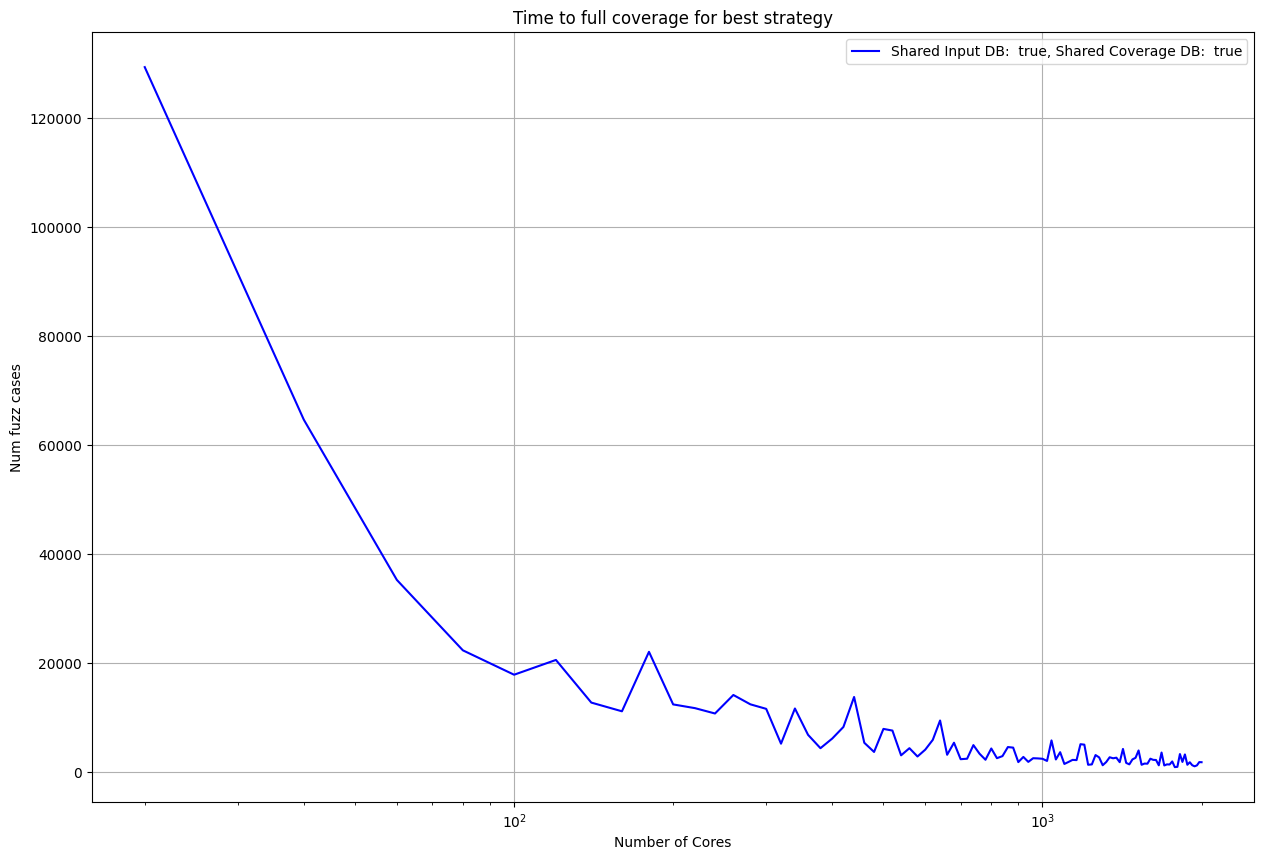

In [2]:
df = pd.read_csv('times_to_full_coverage.csv')
groups = df.groupby(['share_coverage_results', 'share_inputs_database'])

plt.figure(figsize=(15, 10))
plt.title("Time to full coverage for best strategy")
plt.xlabel("Number of Cores")
plt.ylabel("Num fuzz cases")
plt.xscale('log')
plt.grid(True)

# Plot each sorted group
for (idx, (name, group)) in enumerate(groups):
    # Sort the group
    sorted_group = group.sort_values(by='num_cores')
    # Plot
    plt.plot(sorted_group['num_cores'], sorted_group['duration_seconds'], color=colors[idx % len(colors)], linestyle='-', label=label)

# Create a legend and show the plot
plt.legend()
plt.savefig('time_to_full_coverage.png')  # Adjust the path if necessary
plt.show()

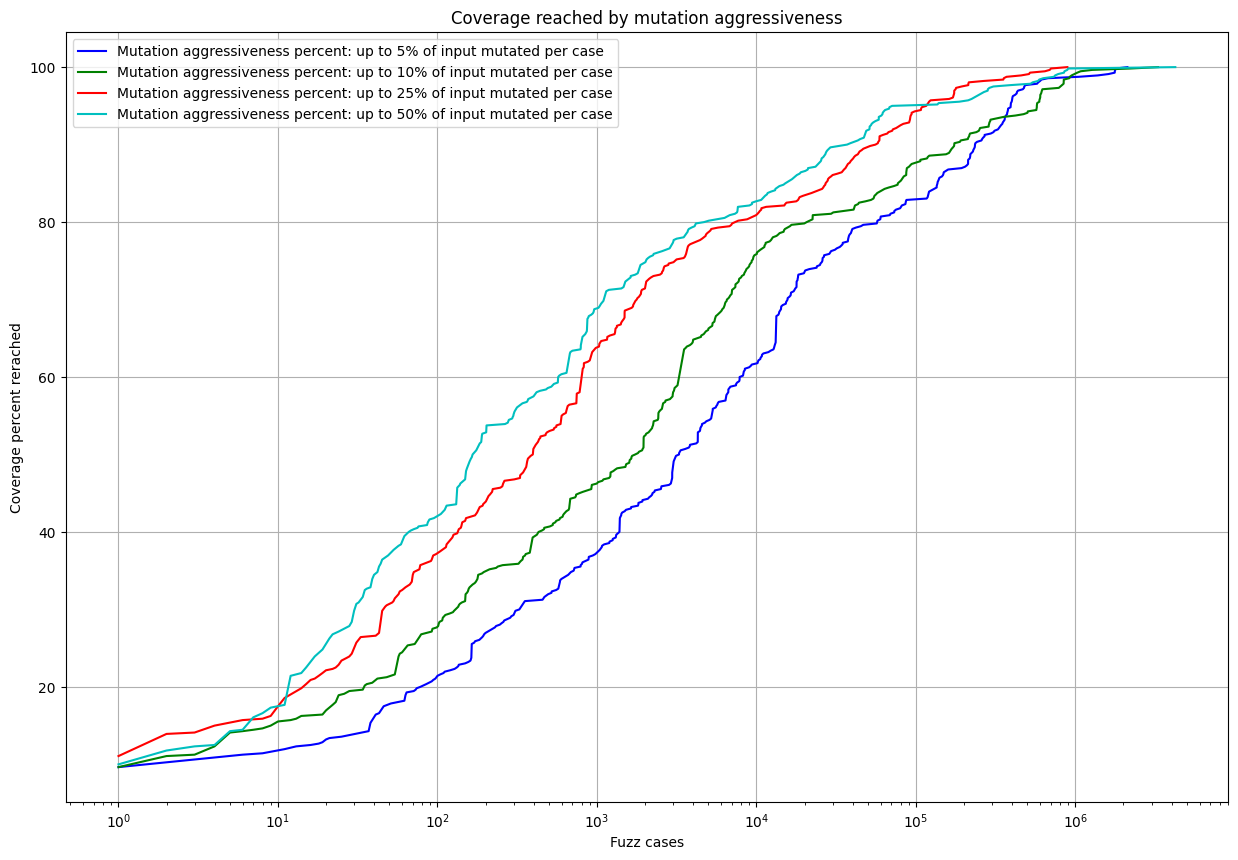

In [3]:
df = pd.read_csv('mutation_aggressiveness.csv')
groups = df.groupby(['mutation_aggressiveness'])

plt.figure(figsize=(15, 10))
plt.title("Coverage reached by mutation aggressiveness")
plt.xlabel("Fuzz cases")
plt.ylabel("Coverage percent rerached")
plt.xscale('log')
plt.grid(True)

# Plot each sorted group
for (idx, (name, group)) in enumerate(groups):
    # Sort the group
    sorted_group = group.sort_values(by='fuzz_cases')
    label = f"Mutation aggressiveness percent: up to {name[0]}% of input mutated per case"
    # Plot
    plt.plot(sorted_group['fuzz_cases'], sorted_group['coverage_reached'], color=colors[idx % len(colors)], linestyle='-', label=label)

# Create a legend and show the plot
plt.legend()
plt.savefig('mutation_aggressiveness.png')  # Adjust the path if necessary
plt.show()